# K-Means Clustering

## 📌 Definition
K-Means is an **unsupervised machine learning algorithm** used to cluster data into **K groups** based on similarity.  
It partitions data so that each point belongs to the cluster with the **closest mean (centroid)**.

---

## ⚙️ Principle of the Algorithm

Steps of K-Means:

1. Choose a value for **K** (number of clusters)
2. Initialize **K centroids**
3. Assign each data point to the **nearest centroid**
4. Recompute centroids as the **mean** of assigned points
5. Repeat assignment + centroid update until convergence

> The algorithm minimizes the **distance between points and their centroids**.

---


### 📦 Importing the Necessary Libraries

Before starting with K-Means clustering, we first need to import the essential libraries that will help us work with data, perform numerical operations, and visualize the clustering results. These libraries provide a strong foundation for handling datasets and running machine learning algorithms efficiently.

- **NumPy** → supports mathematical and numerical operations  
- **Pandas** → used for loading, cleaning, and manipulating datasets  
- **Matplotlib / Seaborn** → tools for visualizing data and clusters  
- **Scikit-learn** → provides the K-Means algorithm implementation and preprocessing utilities

This step ensures that we have all the tools required for data processing, clustering, and interpreting the results visually.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import the libraires for KMeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import the dataset
from sklearn.datasets import load_iris

### 🔍 Exploring the Dataset

Before applying K-Means clustering, it is crucial to first explore the dataset to understand its structure and characteristics. In this example, we will use the **Iris dataset** from `sklearn`, which contains measurements of iris flower features such as sepal length, sepal width, petal length, and petal width. Exploring the data allows us to verify its shape, preview the first rows, check summary statistics, and ensure the data is suitable for clustering. This initial inspection helps us gain intuition about the dataset before running the algorithm.

---

### 📂 Load and Explore the Iris Dataset

In [21]:
# Load the dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Display first rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [22]:


# Check dataset shape
print("Dataset shape:", df.shape)


Dataset shape: (150, 4)


In [23]:
# Statistical summary
print(df.describe())



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [24]:
# Inspect for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 📊 Visualizing the Dataset

Visualizing the dataset before applying K-Means helps us understand the distribution of features and detect natural group patterns. Since the Iris dataset contains four features, we will use a **pairplot** to explore relationships between feature pairs and a **2D scatter plot** to view two key features. This gives us an intuition about potential clusters in the data.

---

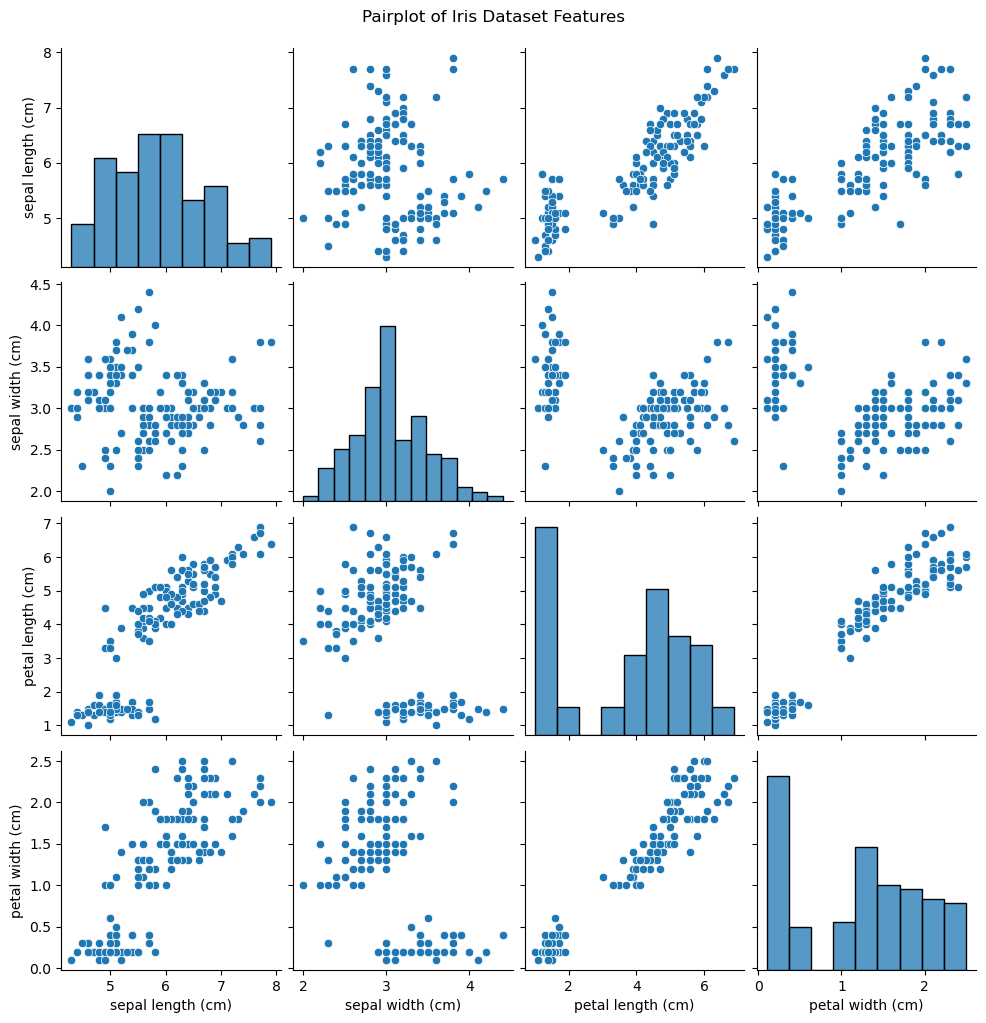

In [25]:
# Pairplot to visualize feature relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

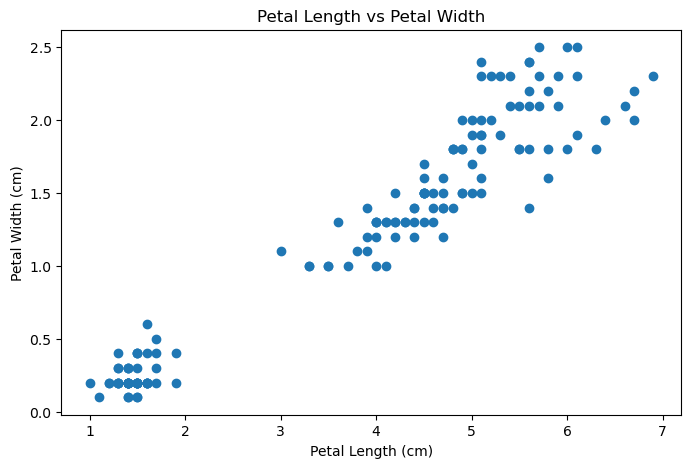

In [26]:
# Simple scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

---
### ⚙️ Standardizing the Data

Before applying K-Means clustering, it is essential to standardize the data. K-Means relies on **distance calculations** (typically Euclidean distance) to form clusters, which means that features with larger numerical ranges can dominate the results. For example, if one feature ranges from 0–100 and another from 0–1, the algorithm will give much more weight to the larger-scale feature. Standardization ensures that **all features contribute equally** by transforming them to have a mean of 0 and a standard deviation of 1. This step makes clustering more accurate and prevents the algorithm from being biased toward features with larger values. In this phase, we prepare the data so that K-Means can identify the natural groups more effectively and fairly across all dimensions.

---

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 📌 Choosing the Optimal Number of Clusters

Before applying K-Means, we must decide how many clusters (**K**) to use. Selecting the right number of clusters is crucial because choosing too few clusters may oversimplify the structure in the data, while choosing too many may lead to overfitting and meaningless groupings. Several methods exist to determine the optimal value of **K**, including:

- **Elbow Method**
- **Silhouette Score Method**
- **Gap Statistic**
- **Davies–Bouldin Index**

Among these methods, the **Elbow Method** is one of the most commonly used due to its simplicity and effectiveness—especially for well-structured datasets like Iris.

### 🎯 Why the Elbow Method?

The Elbow Method works by running K-Means for a range of cluster values (e.g., K = 1 to 10) and calculating the **Within-Cluster Sum of Squared Distances (WCSS)**, also called *inertia*. WCSS measures how tightly the data points are grouped around their cluster centroids. As **K increases**, WCSS decreases because more clusters reduce the distance between points and centroids.

The key idea is to look for a point where the rate of improvement sharply slows down — this forms a **“bend” or “elbow”** in the curve. This point suggests that adding more clusters does not significantly improve clustering performance. We choose **K** at the elbow because it provides a balance between **accuracy** and **simplicity**, avoiding unnecessary complexity while capturing meaningful patterns in the data.

In our case, we will use the Elbow Method to determine the most appropriate number of clusters before applying K-Means.


In [28]:
# defining the elbow method function
def elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("WCSS")
    plt.xticks(range(1, max_k+1))
    plt.show()

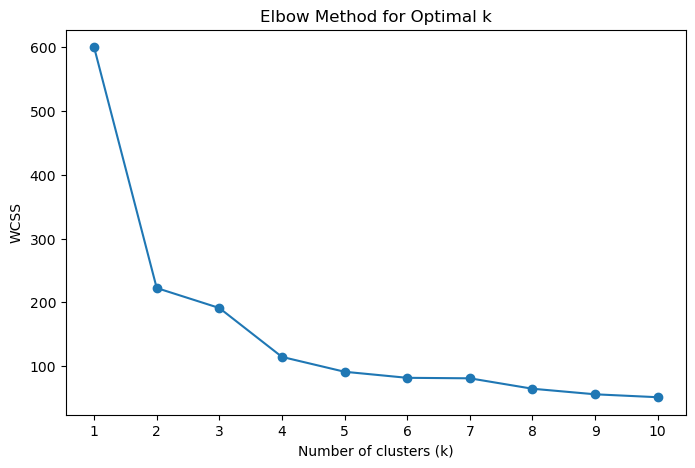

In [29]:
# Apply the elbow method
elbow_method(scaled_data, max_k=10)

In [30]:
# Applying KMeans with optimal k
optimal_k = 4  # Based on elbow method observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [31]:
df['Cluster'] = labels
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### 🎨 Visualizing the Clusters

Once we determine the optimal number of clusters and fit the K-Means model, the next step is to **visualize the resulting clusters**. Visualization helps us interpret how well the algorithm separated the data and whether the clusters make intuitive sense. Since the Iris dataset has multiple features, we will focus on two of them — **Petal Length** and **Petal Width** — because they show strong separation between iris species. Each point will represent a flower, and its color will indicate the cluster it belongs to. We will also plot the **cluster centroids** to clearly show the center of each group formed by the algorithm. This visual inspection gives us a better understanding of how K-Means grouped the data in feature space.

---

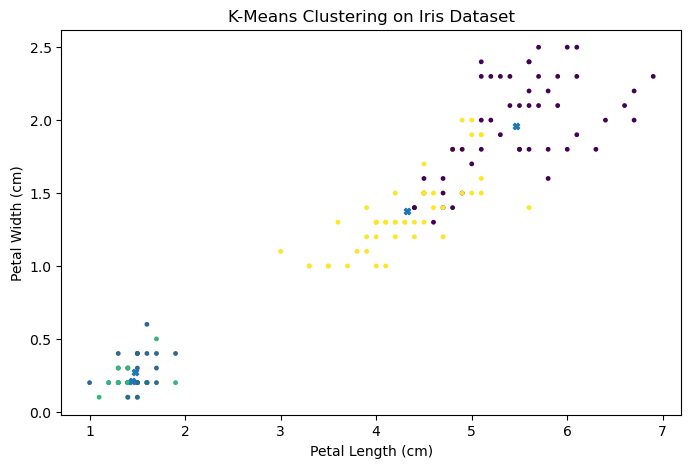

In [32]:
# Plot clusters (Petal Length vs Petal Width)
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=df['Cluster'], s=6)

# Plot centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,2], centroids[:,3], marker='X', s=20)

plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

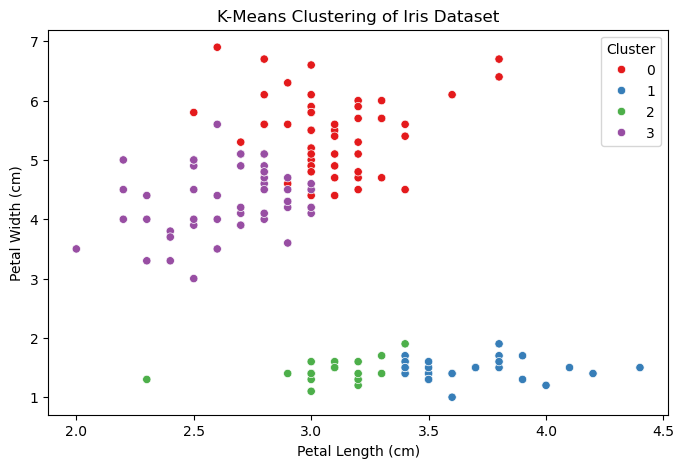

In [33]:
#now let's visualize the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], hue=df['Cluster'], palette='Set1')
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Cluster')
plt.show()

### ✅ Comparing the Clustering Results With the Actual Labels

To evaluate how well K-Means performed, we compare the **predicted clusters** with the **true labels** from the Iris dataset. Although K-Means is an **unsupervised algorithm** and does not use true labels during training, comparing them helps us check how closely the algorithm's clustering aligns with the natural classes in the dataset. This gives us an idea of the model's effectiveness and whether it successfully discovered meaningful patterns. We will use a **confusion matrix** and **accuracy score** to assess the clustering performance.

> Note: Since cluster labels are assigned arbitrarily (e.g., cluster 0, 1, 2), they may not match the exact class numbers, but the grouping should still reflect the actual species structure.

---

### 📈 Evaluating Clustering with Silhouette Score

Since K-Means is an **unsupervised algorithm**, we need a metric that does not rely on true labels. The **Silhouette Score** is one of the best ways to evaluate clustering quality. It measures how similar each point is to its own cluster compared to other clusters.

- A score close to **+1** → well-defined clusters  
- Around **0** → overlapping clusters  
- Negative values → wrong clustering assignment  

Silhouette score is ideal because it evaluates how natural and well-separated the clusters are, making it a reliable metric when true labels are unknown or unusable.

---


In [34]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, labels)

print("Silhouette Score:", score)

Silhouette Score: 0.3850454053045391


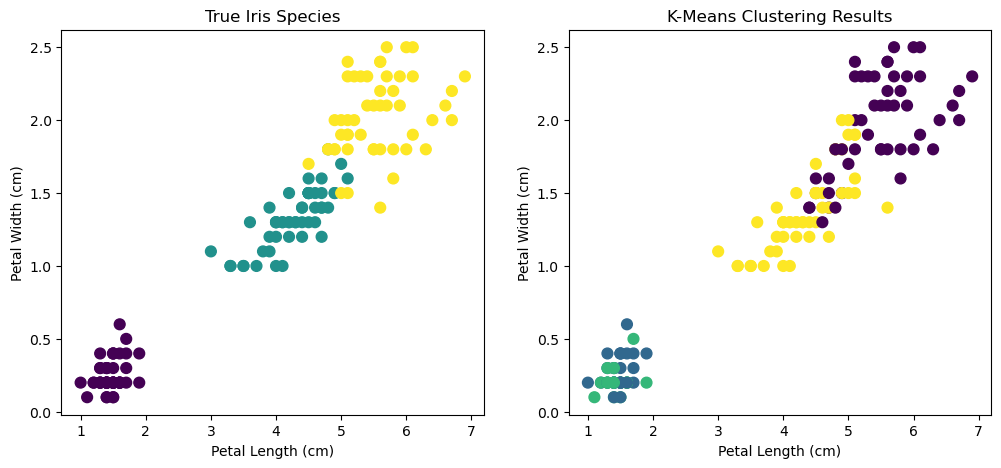

In [35]:
# Create subplots
plt.figure(figsize=(12,5))

# True labels
true_labels = iris.target


# True Labels Plot
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=true_labels, s=60)
plt.title("True Iris Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Predicted Clusters Plot
plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=df['Cluster'], s=60)
plt.title("K-Means Clustering Results")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.show()